<h1>Baseline performance</h1>
<p>In order to provide an objective reference point, before any modification was done to the "Videmics" algorithm, its performance had to be evaluated in a local environment. This was so to provide a reference point unaffected by environmental factors which might not have been documented or due to technical limitations or availability of resources were not possible to reproduce.</p>
<p>The baseline algorithm was decided to be a simplified version of the inital algorithm which was the source of the latter so-called "Videomics". The selected baseline,&nbsp;&nbsp;the predecessor of "Videmics" was first introduced in [1].</p>
<p>However, it must be said that the pipline (variant) implemented for this baseline experiment differs as it entails no post-processing and evaluation of multiple possible matches (paths).&nbsp;</p>
<p>The match, gap and egap values used in this experiment were adviced by one of the authors of [1].</p>
<p>Additional notes:</p>
<p>There are various strategies to initialise the Dynamic Programming matrix forming a substatntial component of this stereo matching algorithm.&nbsp;</p>
<p>The first one was in line with the Niedelman and Wunch algorithm [2], initialising the first row and column as if they were the results of mismatches, calculating gaps and egaps according to the position in the matrix. The second one initialises each cell to a constant, the value of gaps and the third one a constant as well, the squared value of gaps.</p>
<p>These three approaches were all informed by/based on the unpublished work of team members of behind [1].</p>
<p>It is also important to be noted, that the algorithm's hyperparameters were initialised based on the work of the team behind the algorithm "Videomics", as the following (special thanks to J.C. Nebel, who was an influential part of the team which concieved and pioneered the idea of "Videomics")</p>
<ul>
<li>Match: 60</li>
<li>Gap: -20</li>
<li>E-gap: -1</li>
</ul>
<h1>Experimental method</h1>
<ol>
<li>As a first step, two datasets, "teddy" and "cones" were loaded and visualised (smallest size).</li>
<li>Then, occluded regions were added to the groundtruth images. This was done as the algorithm intended to be benchmarked is said to perform-well in occluded regions, which was thought to be a relevant facet to be tested. By default, the Middlebury 2003 dataset does not have these occluded regions added. For further details please visit the <a href="http://vision.middlebury.edu/stereo/eval/" target="_blank" rel="noopener"> Middlebury Evaluation V2 site. </a></li>
<li>As a final step, the algorithm was tested and evaluated against the non-modified grountruths (occluded regions were not added) and modified groundtruths as well. The metrics used were:<br />
<ol>
<li>Bad (with thresholds 1, 2 and 10): this is the default evaluation metric at&nbsp;the <a href="http://vision.middlebury.edu/stereo/eval/" target="_blank" rel="noopener"> Middlebury Evaluation V2 site.</a></li>
<li>MSE (Mean Squared Error), AVG (Average Error) and Eucledian Distance: These are metrics thought to provide a more accurate way of measuring performance due to them not being thresholded and quadratic relationships (MSE and Eucledian Distance). AVG was included as based on [3], it is a commonly used performance metric as well, but does not transform the results in a quadratic way and more forgiving [3].</li>
</ol>
</li>
</ol>
<h2>References</h2>
<ol>
<li>Needleman SB, Wunsch CD. A general method applicable to the search for similarities in the amino acid sequence of two proteins. J Mol Biol. 1970 Mar 28;48(3):443&ndash;53.</li>
<li>Dieny R, Thevenon J, Martinez-del-Rincon J, Nebel JC. Bioinformatics inspired algorithm for stereo correspondence. VISAPP 2011 - Proc Int Conf Comput Vis Theory Appl. 2011;465&ndash;73.</li>
<li>Stanford University. CS231n Convolutional Neural Networks for Visual Recognition [Internet]. 2020 [cited 2020 Apr 23]. Available from: https://cs231n.github.io/classification/</li>
</ol>

In [1]:
import sys
import os
sys.path.append("../../")

ROOT_PATH = os.path.join("..", "..")
EXPERIMENT_TITLE = "ALG_001-EXP_001-Baseline"

DATASET = "middlebury"

DATASET_FOLDER = os.path.join(ROOT_PATH, "datasets", DATASET)
LOG_FOLDER = os.path.join(ROOT_PATH, "experiments", "logs")
CSV_FILEPATH = os.path.join(LOG_FOLDER, EXPERIMENT_TITLE+".csv")
IMG_RES = "450X375"
PREPROCESSING_METHOD = "None"
KERNEL_SIZE = 1
KERNEL_SPEC = "None"

SCENES = ["teddy", "cones"]
SIZE=""
YEAR= 2003
EXP_PARAMS = dict()

In [2]:
###################################################################
# Built-in modules ################################################
###################################################################

import numpy as np
import imp
import cv2
import os
import matplotlib.pyplot as plt
import gc
from components.utils.CSVWriter2 import Wrapper as l
from components.utils.Metrix import Wrapper as me
import math
import time
import glob

###################################################################
# Custom modules ##################################################
###################################################################

from components.matchers.OriginalMatcher import Wrapper as m
from components.utils.SimpleProgressBar import SimpleProgressBar
from components.utils import utils as u
from components.utils import plot_utils as plu
from components.utils.CSVWriter2 import Wrapper as csv

###################################################################
# Dataset specific modules#########################################
###################################################################

from components.utils import middlebury_utils as mbu


#  Loading the dataset and visualising the results

['im2.png', 'im6.png', 'disp2.png', 'teddy_nonocc.png']
..\..\datasets\middlebury\middlebury_2003\teddy\im2.png
..\..\datasets\middlebury\middlebury_2003\teddy\im6.png
..\..\datasets\middlebury\middlebury_2003\teddy\disp2.png
..\..\datasets\middlebury\middlebury_2003\teddy\teddy_nonocc.png
['im2.png', 'im6.png', 'disp2.png', 'cones_nonocc.png']
..\..\datasets\middlebury\middlebury_2003\cones\im2.png
..\..\datasets\middlebury\middlebury_2003\cones\im6.png
..\..\datasets\middlebury\middlebury_2003\cones\disp2.png
..\..\datasets\middlebury\middlebury_2003\cones\cones_nonocc.png


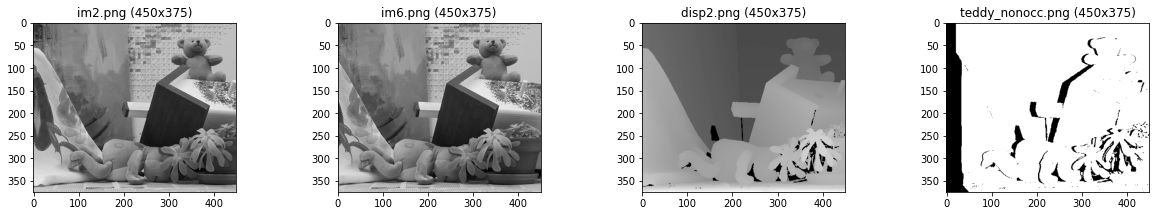

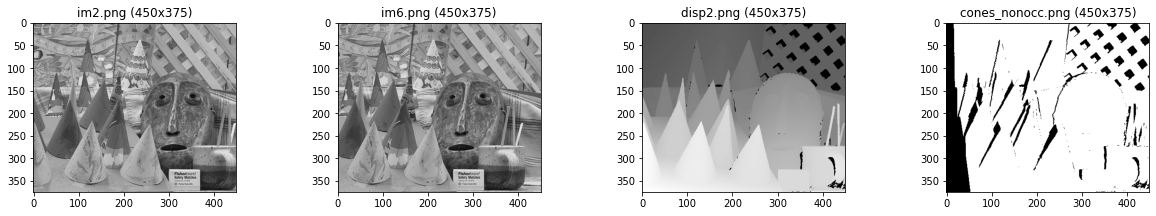

In [3]:
loaded_imgs_and_paths = list(mbu.get_images(DATASET_FOLDER, YEAR, scene, size=SIZE) for scene in SCENES)

for im, path in loaded_imgs_and_paths:
    filenames = list(os.path.split(p)[-1] for p in path)
    plu.plot_images(im, filenames)

# The addition of occluded areas to the pristine groundtruth images

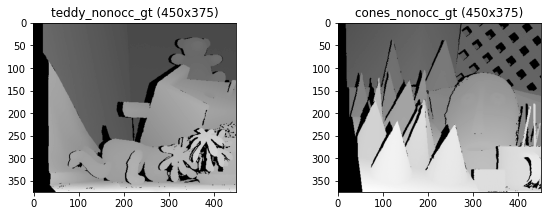

In [4]:
###################################################################
# 2. Occluded areas are added to the groundtruths #################
###################################################################

nonocc_gts = list()
for imgs, paths in loaded_imgs_and_paths:
    temp = mbu.add_masks_to_raw_disparity(imgs[2], imgs[3])
    nonocc_gts.append(mbu.add_masks_to_raw_disparity(imgs[2], imgs[3]))
plu.plot_images(nonocc_gts, ["teddy_nonocc_gt", "cones_nonocc_gt"])

# Benchmarking and evaluation

In [ ]:
###################################################################
# 3.1 Initialising hyperparameters and matcher#####################
###################################################################

csv_logger = csv(CSV_FILEPATH, default_header=False)
csv_logger.set_header_function(csv_logger.get_header_v3)
csv_logger.write_csv_header()
csv_logger.set_line_function(csv.format_stereo_matching_results_v2)

MATCH = 40
GAP = -20
EGAP = -1


EXP_PARAMS = {"experiment_id":EXPERIMENT_TITLE, "match": MATCH,"gap":GAP,"egap":EGAP,\
                  "algo":str(m.__module__), "init_method":"default","dataset":DATASET+SIZE,\
                  "preprocessing_method":"None","kernel_size":1,"kernel_spec":"None"}

In [ ]:
###################################################################
# 3.2 Matching ####################################################
###################################################################

results = []
#init_functions = [[m.fillUpFirstRows, "default"], [m.fillUpFirstRows2, "gap*col_index"], [m.fillUpFirstRows3, "gap*col"]]
init_functions = [[m.fillUpFirstRows2, "gap*col_index"]]

for init_function in init_functions:
    matcher = m(MATCH, GAP, EGAP, first_rows_fill_func = init_function[0])
    EXP_PARAMS["init_method"] = init_function[1]
    for i, scene in enumerate(SCENES):
        EXP_PARAMS["scene"] = scene
        EXP_PARAMS["image_filename"] = IMAGE_FILENAME = loaded_imgs_and_paths[i][1][0]
        EXP_PARAMS["img_res"] = "{0}x{1}".format(loaded_imgs_and_paths[i][0][1].shape[1], loaded_imgs_and_paths[i][0][1].shape[0])  
        occ = loaded_imgs_and_paths[i][0][3]
        gt = loaded_imgs_and_paths[i][0][2]
        matcher.initialize(loaded_imgs_and_paths[i][0][0], loaded_imgs_and_paths[i][0][1])
        tic = time.time()
        matcher.alignImages()
        toc=time.time()
        EXP_PARAMS["runtime"] = toc-tic
        
        disp = matcher.lastDisparity
        disp = disp*4
        EXP_PARAMS["are_occlusions_errors"] = ARE_OCCLUSIONS_ERRORS = False
        EXP_PARAMS["bad1"], EXP_PARAMS["bad2"], EXP_PARAMS["bad10"], EXP_PARAMS["mse"], EXP_PARAMS["avg"], EXP_PARAMS["eucledian"] =\
        BAD1, BAD2, BAD10, MSE, AVG, EUCLEDIAN = me.evaluate_over_all(disp, gt, occ, occlusions_counted_in_errors = ARE_OCCLUSIONS_ERRORS)

        csv_logger.append_new_sm_results(EXP_PARAMS, selected_keys=csv.get_header_v2())

        
        # Here the grountruth is passed as occlusion map in order to exclude the unknown areas (black)
        # from the calculation.
        EXP_PARAMS["are_occlusions_errors"] = True

        
        EXP_PARAMS["bad1"], EXP_PARAMS["bad2"], EXP_PARAMS["bad10"], EXP_PARAMS["mse"], EXP_PARAMS["avg"], EXP_PARAMS["eucledian"] =\
        BAD1, BAD2, BAD10, MSE, AVG, EUCLEDIAN = me.evaluate_over_all(disp, gt, gt, occlusions_counted_in_errors = ARE_OCCLUSIONS_ERRORS)

        csv_logger.append_new_sm_results(EXP_PARAMS, selected_keys=csv.get_header_v2())
        results.append(disp)

In [ ]:
SAVE_PATH  = os.path.join(ROOT_PATH, "experiments", "disparities", EXPERIMENT_TITLE)
saved_image_names = []
for result in results:
    temp_path = u.save_disparity(SAVE_PATH, result)
    saved_image_names.append(os.path.split(temp_path)[-1])

In [8]:
import pandas as pd
experiment_log = pd.read_csv(CSV_FILEPATH)
experiment_log.sort_values(by="bad1", inplace=True) 
experiment_log.head(8)